# Example

In [40]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
% matplotlib inline

from madminer.madminer import MadMiner

## 1. Create MadMiner object

In [41]:
miner = MadMiner()

## 2. Define parameter space

In [42]:
miner.set_parameters()

miner.add_parameter(
    lha_block='dim6',
    lha_id=1,
    parameter_name='fW',
    morphing_max_power=4,
    morphing_parameter_range=(-1.,1.)
)
miner.add_parameter(
    lha_block='dim6',
    lha_id=2,
    parameter_name='fWW',
    morphing_max_power=4,
    morphing_parameter_range=(-1.,1.)
)

# miner.parameters

## 3a. Define benchmark points manually

In [43]:
thetas_old = np.array([[ 0.        ,  0.        ],
       [-0.8318245 ,  0.85645093],
       [-0.82002127, -0.85191237],
       [ 0.76870769, -0.81272456],
       [ 0.7819962 ,  0.86242685],
       [-0.57243257,  0.37755934],
       [-0.29730939,  0.74563426],
       [ 0.13777926,  0.35254704],
       [ 0.46330191,  0.51783982],
       [ 0.64649576, -0.01232633],
       [ 0.16629182, -0.29365045],
       [ 0.39752054, -0.64235507],
       [-0.19238158, -0.59962178],
       [-0.30730345, -0.09697784],
       [-0.70631846, -0.18913046]])
sigma_old = np.array([4.92965279e-05, 6.83382103e-05, 4.22844684e-05, 6.81120181e-05,
       8.05435737e-05, 5.14220010e-05, 6.00612255e-05, 5.58533471e-05,
       6.52649027e-05, 6.40148768e-05, 5.06553260e-05, 5.63650294e-05,
       4.44396211e-05, 4.48747537e-05, 4.34450824e-05])

In [44]:
miner.set_benchmarks()

for theta in thetas_old:
    miner.add_benchmark(
        {'fW':theta[0], 'fWW':theta[1]}
    )

miner.benchmarks

OrderedDict([('benchmark_0', {'fW': 0.0, 'fWW': 0.0}),
             ('benchmark_1', {'fW': -0.8318245, 'fWW': 0.85645093}),
             ('benchmark_2', {'fW': -0.82002127, 'fWW': -0.85191237}),
             ('benchmark_3', {'fW': 0.76870769, 'fWW': -0.81272456}),
             ('benchmark_4', {'fW': 0.7819962, 'fWW': 0.86242685}),
             ('benchmark_5', {'fW': -0.57243257, 'fWW': 0.37755934}),
             ('benchmark_6', {'fW': -0.29730939, 'fWW': 0.74563426}),
             ('benchmark_7', {'fW': 0.13777926, 'fWW': 0.35254704}),
             ('benchmark_8', {'fW': 0.46330191, 'fWW': 0.51783982}),
             ('benchmark_9', {'fW': 0.64649576, 'fWW': -0.01232633}),
             ('benchmark_10', {'fW': 0.16629182, 'fWW': -0.29365045}),
             ('benchmark_11', {'fW': 0.39752054, 'fWW': -0.64235507}),
             ('benchmark_12', {'fW': -0.19238158, 'fWW': -0.59962178}),
             ('benchmark_13', {'fW': -0.30730345, 'fWW': -0.09697784}),
             ('benchmark_14', {'f

## 3b. Define benchmark points through morphing

In [45]:
miner.set_benchmarks_from_morphing(keep_existing_benchmarks=True,
                                   n_trials=1000)

basis = []
for _, parameters in miner.benchmarks.items():
    basis.append([value for _, value in parameters.items()])
basis = np.array(basis)

In [46]:
def normalize_wi(wi):
    sigma_wi = sigma_old * wi

    denom = np.ones_like(sigma_wi)
    denom[:] /= np.sum(sigma_wi)

    return (sigma_wi * denom)

In [47]:
xi = np.linspace(-1.,1.,100)
yi = np.linspace(-1.,1.,100)
xx, yy = np.meshgrid(xi, yi)
xx = xx.reshape((-1,1))
yy = yy.reshape((-1,1))
theta_test = np.hstack([xx, yy])

squared_weights = []
squared_weights_normalized = []

for theta in theta_test:
    wi = miner.current_morpher._calculate_morphing_weights(theta, None)
    wi_normalized = normalize_wi(wi)
    squared_weights.append(np.sum(wi*wi)**0.5)
    print(np.sum(wi*wi)**0.5)
    squared_weights_normalized.append(np.sum(wi_normalized*wi_normalized)**0.5)
    
squared_weights = np.array(squared_weights).reshape((100,100))
squared_weights_normalized = np.array(squared_weights_normalized).reshape((100,100))

12.07674429759072
5.5370279408385175
13.105355227423217
22.96147529944826
32.54615274414009
41.63833139340584
50.2013177655268
58.23427842828087
65.74703419910026
72.75334119010465
79.26857336584415
85.30877557875719
90.89022679625283
96.02921938596819
100.74193931560431
105.04439727305231
108.95238714120175
112.48145995053811
115.6469069809333
118.46374847778286
120.94672592666245
123.11029664815547
124.96862994359972
126.53560430069433
127.82480533776592
128.84952427193355
129.62275676468104
130.1572020430589
130.46526222457885
130.55904179412366
130.45034719515766
130.15068650728134
129.67126918907536
129.02300587010862
128.21650817954207
127.2620886013402
126.16976034798252
124.94923724594803
123.60993362725122
122.16096422204866
120.61114404787286
118.9689882914469
117.24271217932296
115.44023083380847
113.56915911081946
111.63681141645658
109.65020149925238
107.61604221521493
105.54074526300354
103.43042088684474
101.29087754514161
99.12762154317619
96.94585662886516
94.750483551

22.335238121999723
21.08126747253404
19.815631234278893
18.534119007336102
17.23241447031094
15.906187602199195
14.551247232373193
13.163806259431206
11.740969963203275
10.281698263775024
8.788864511298593
7.274126759553682
5.770927982846629
4.373662084156731
3.353652127767666
3.268015527069814
4.316773719163455
6.043606507229278
8.123987219790484
10.438617813352725
12.946886763404626
57.8398831604311
47.175579602134725
37.10577729050227
27.613973031874238
18.68842553701355
10.338929694618988
2.8850152978944905
5.405437979046743
12.158741010866907
18.56920978583867
24.55622227937337
30.121251302372425
35.2760987621415
40.034990092591244
44.412808803612194
48.424545988222775
52.08508982615243
55.409132993794124
58.41112752050844
61.1052609636402
63.50544301710645
65.62529758751378
67.47815790037431
69.07706336574597
70.43475750641663
71.5636865494896
72.47599844396328
73.18354215830345
73.6978671654718
74.03022305510792
74.19155923251277
74.19252467672297
74.04346773813198
73.7544359614

16.31391687474971
18.55246631297131
20.970653156482342
89.30158222984596
80.13679175970643
71.48931924589729
63.341357669533586
55.675436861384455
48.474442092210786
41.72164574173089
35.400764179276365
29.49606679481366
23.992602857076914
18.876726772741513
14.137505116594584
9.771378871128038
5.803994962495295
2.489774995287417
2.4097569955425397
5.126102421389686
7.890415049003032
10.449721197706237
12.776877433056573
14.873099625953646
16.746330396849885
18.406609783273524
19.864676279490563
21.131444089336885
22.21777716685118
23.134380517210047
23.89174341299219
24.500107705965
24.969449146896228
25.309465839451125
25.529570790266263
25.638886898829355
25.64624344155194
25.56017348740794
25.388911897204498
25.140393683056157
24.822252578984774
24.441819719138138
24.00612234876261
23.52188251159965
22.9955156698937
22.433129222273994
21.840520892133462
21.223176966027722
20.5862703690508
19.93465857296607
19.272881343851104
18.60515834985427
17.93538666695567
17.26713824180595
16.

2.6093009328193166
2.358574186955859
2.1588928226958406
2.004032753333265
1.8900602603964711
1.8150144768166252
1.778094547244965
1.7785437490208358
1.8146196337640166
1.8830483401802092
1.9791011054289789
2.0970977155023838
2.231008891818741
2.3749291661684
2.523355939209738
2.671311090183937
2.814366857732624
2.948625518795215
3.0706828664144843
3.1775905534866253
3.2668235497070657
3.3362545370225942
3.384135190605489
3.4090837185484886
3.4100780840151765
3.3864546891893683
3.3379128518514216
3.264526172879425
3.1667630011717716
3.0455199020594774
2.9021747722589404
2.7386707903333307
2.5576500350303832
2.3626682879090843
2.158542272934104
1.9519052807055068
1.7520525986729936
1.5720391401107279
1.4294456279668324
1.3449066933405434
1.3357466876360047
1.4067146532348591
1.547267762531883
1.7387679448759228
1.9628558930913462
2.205069125721616
2.4550419244525608
2.7057369142820993
2.9527893784781902
3.1941928502560653
3.4302926803944396
3.664008627568967
3.9012005137840284
4.15106919

51.54240862706293
47.194556262351924
43.157318559860165
39.41657493343884
35.95849275182616
32.76952232903202
29.83639072430782
27.14609423131872
24.685889518032692
22.44328352854514
20.406022500411858
18.562080808176407
16.89965082404308
15.407135566959905
14.073146513930494
12.886509417694041
11.836281075894997
10.911779440580036
10.102627993647655
9.398812876853187
8.790748125049243
8.269341191819814
7.8260487685292635
7.452912663706402
7.142567773587795
6.888218704641622
6.6835873569724145
6.522839200317031
6.400499586976609
6.311372359062368
6.250471211486754
6.212970562984632
6.194178294497451
6.189528822514715
6.194592354937403
6.205095051294
6.216944949006665
6.226259461990743
6.229391529820802
6.22295273606617
6.203832724078787
6.169214955336956
6.1165893056300416
6.043762246291912
5.94886549057302
5.830364074230139
5.687064953817658
5.51812741746029
5.323077001741883
5.101825334459831
4.854699619102573
4.582487792696273
4.2865095906675
3.968731561391908
3.6319589883755645
3.2

4.535720737615248
4.532798121064141
4.505489306940636
4.4517224200699355
4.369738293603163
4.25810504047453
4.115734484650772
3.9419036451214797
3.7362863472303895
3.499003922851126
3.2307122094202056
2.9327604574717494
2.607501620967696
2.2589467393766114
1.8942751989608853
1.5276832668626414
1.1909324837890713
0.9585111573728676
0.952689595951344
1.2043354420681267
1.6133517609767956
2.099609110727829
2.6258345785054993
3.1738744021092056
3.732895329161212
4.29498837069498
4.85345583852475
5.402079281147282
5.934778690163037
6.44544303545291
6.927842753691944
7.375585109940813
7.78209451577659
8.140609681718576
8.444194644210384
8.685764090734489
8.85812647668386
8.954052286683433
8.966380791210668
8.88818908133464
8.713066549853684
8.435575899390926
8.052059532602168
7.562117390475138
6.971457187370418
6.29767664239244
5.5824062293900925
4.916035343513376
4.475932525437333
4.524699301610725
5.253062970767946
6.630716765674523
8.524846662734083
10.83436755790263
13.506404650817753
16

2.2546196740662885
2.3615823833547775
2.4438014697416115
2.498063465325692
2.5218028267054655
2.513015287003494
2.470209447505335
2.392390483503349
2.2790782840810335
2.130375011293947
1.9471227780412905
1.731255613253169
1.4866296837320776
1.2211915581361126
0.9533680632795585
0.7317212063514569
0.6677592872255643
0.8459721573346901
1.1906761682153846
1.6186492686519105
2.093518224926739
2.5991601988362647
3.1264206517153066
3.6686765974813036
4.220252533247678
4.775783650948321
5.329931120863553
5.877243306072864
6.412083407874457
6.928589889788948
7.420654305739857
7.881909090384979
8.305721594574317
8.68519255522773
9.013158290017657
9.282196683199741
9.484637757481272
9.612580539776866
9.657919324479808
9.612384828811436
9.46761013348836
9.215239877299583
8.847118893504963
8.355635542914941
7.734387892873951
6.979582517322249
6.09327516688402
5.091855057621755
4.031658239759736
3.094235774675071
2.778946220614949
3.5999243097561395
5.294270466964292
7.498277804809304
10.0724089668

11.030614536205789
10.773041115167418
10.465917914536512
10.11227218407004
9.71597703431698
9.281490187925138
8.813659186480903
8.317575851935262
7.798467592508063
7.261616767910881
6.712302106081511
6.155758405853789
5.5971527811329445
5.041577870722812
4.494065285235799
3.9596269925196235
3.4433400446292355
2.9505042748805645
2.4869293442036473
2.0594554999533043
1.6768792810483364
1.3514329565335577
1.1002236234136307
0.9427974777753132
0.8874495873126284
0.9146934010726638
0.986156587997974
1.067565389906021
1.1370021093929226
1.1821704469086125
1.1966398876103188
1.1776222125855489
1.1250624342679432
1.041760373297766
0.9347582246154289
0.8190441081027768
0.7250254062494542
0.7038532258309891
0.8019352043908516
1.0174888910606616
1.3188786088119673
1.6796398584559955
2.083590588090341
2.5204989587563036
2.982954387501834
3.4648140060898984
3.9604609639727735
4.464437884096386
4.971256281183546
5.475292316254827
5.970727106087348
6.451511175509267
6.911342603663192
7.34365328596229

4.183691797364214
3.4686859278683175
2.6370274945882763
1.7630157990039454
1.2637691580969481
1.957383591787673
3.402807054146937
5.198041321906675
7.2665065666050355
9.597373365210837
12.195427431112972
15.070632406751077
18.235173941414363
21.702415463125394
25.486466864053817
29.601984565036467
34.0640702637505
38.88821594269672
44.09027225933999
49.68642950457694
55.693205671642595
62.127438725519646
69.0062814474446
76.34719790952447
84.16796101060318
92.48665072031932
101.32165280623454
30.907513437539414
30.125401365109838
29.29729952066559
28.423460583871243
27.505272419701413
26.54503768737916
25.545787684946855
24.51112572188808
23.44509564480073
22.35207161401827
21.23666574468129
20.103650730009996
18.957895031041616
17.804308636675994
16.647797771999883
15.493227270230031
14.345389639103916
13.208980168682265
12.088577779309052
10.988631754086558
9.913455143435636
8.867226667239843
7.854004768898201
6.87776093645689
5.942446389441025
5.0521212578176815
4.211210033425152
3.

4.147715456782385
4.414437583795024
4.617856844339148
4.758772968433599
4.838457583253581
4.858588329919003
4.821215342545879
4.728745962215739
4.583941640395688
4.389925337000557
4.150201013452963
3.868690774571071
3.549801953067884
3.1985502406562527
2.8207964294735013
2.4237324723242546
2.0169638562037027
1.6151505568983782
1.2449557133288056
0.9620759824586212
0.8645579982295588
1.0018074009958067
1.2875716636710233
1.627844313461094
1.9740419705018073
2.3012759814354173
2.593876350921825
2.839855727082984
3.028816441082961
3.1511237745098284
3.1976129177847
3.159605886170851
3.0292547630761932
2.800498377052934
2.471615888823776
2.0528951909795383
1.5938309962805843
1.2808894136912852
1.5093180050433455
2.33727964715739
3.5351637599577903
5.002371254496017
6.7139415085551635
8.668529302125117
10.873057437085336
13.337942054208701
16.075358427722247
19.098519988297426
22.421344572630087
26.05828615845788
30.024243992039764
34.334510668120934
39.00474104244074
44.050932867875716
49.

7.081661485608662
7.382083289651349
7.609456760948267
7.765254244700792
7.851272411993786
7.8696208748741565
7.822715994309409
7.713277880494356
7.544329565282784
7.319197886875992
7.041516007426631
6.715227821471684
6.344594916471611
5.934207352063252
5.4890005631282
5.014282623813468
4.5157799346695064
3.999717436463334
3.4729675004399727
2.9433452530024127
2.420242644712171
1.9161221943071352
1.4503978893437792
1.0600146946812348
0.8204862257548362
0.8175716131241657
1.0017194322229397
1.2473315397140834
1.4811638112174945
1.6690060087264242
1.7917631972286034
1.8365100903886813
1.7940083796939346
1.6594798299994502
1.4380681968915612
1.165352726819523
0.9786687730925789
1.1706616263412433
1.8179161427669397
2.777741335311751
3.9811453740668186
5.412247338052551
7.072921403809337
8.97147149373655
11.118989006438678
13.528008642304258
16.211944812133265
19.184829536760287
22.46118000463642
26.05592699619533
29.984374009227
34.26217282024595
38.90530829655898
43.9300886412735
49.35313

18.238996361523302
16.116308215749022
14.057712849395552
12.067225505941366
10.149144614898711
8.308468012704097
6.551910977751537
4.890781128027615
3.3510249587156062
2.0208840926875187
1.3128276079745327
1.8458181136747043
2.901546102866326
4.0093537890366315
5.07218655063015
6.063744849144538
6.97422676678823
7.799225977444273
8.536612042769526
9.185434659736412
9.745473886182385
10.21703343583686
10.60083735563381
10.897975037039336
11.109870597392252
11.238265340558206
11.285207630371218
11.25304719083997
11.144432208913049
10.962308353848616
10.709919261502023
10.390808321711468
10.008821843332317
9.568113920647898
9.073153656713629
8.528735916483747
7.939997669467583
7.31244360364334
6.6519878261332535
5.965024868015816
5.258557124416332
4.5404383412560705
3.819875192227363
3.1085595358104277
2.423521346267228
1.7952250160689154
1.2917097376500897
1.0606451270844224
1.2106979350809914
1.589725506171037
2.0281815318195777
2.450351638790644
2.822004107416554
3.1229850135046857
3.3

10.723384980081741
11.387784198072
11.941391505942077
12.38407232949377
12.716245965388316
12.938782558443776
13.05294337591857
13.060345524591733
12.962941307061172
12.763007004955076
12.46313840911187
12.066252013462305
11.575592064485908
10.994745077315635
10.327665569529291
9.578720681111676
8.75276941160363
7.855310366730279
6.892776725328178
5.8731801786031195
4.807691223345975
3.7151753485720285
2.6382980029262213
1.7165459188781698
1.4378790457245758
2.1379927908238225
3.2614175927997673
4.513284431074582
5.813174396103611
7.1304342887101075
8.447805754974876
9.752507974076265
11.03345515813368
12.280211239143844
13.482539376489475
14.630186480463594
15.712771394534581
16.719722956200055
17.640243819738668
18.463288400177657
19.177548973002285
19.771446723933565
20.23312596903521
20.55045055059025
20.71100188557957
20.702078471864848
20.510696951168665
20.123595189734054
19.52723841839795
18.707830577147806
17.651335347998458
16.343516802468336
14.770023598523453
12.91658146270

56.61723341191871
67.42439918800585
78.91751129750116
91.11855983134294
104.04987564337452
117.73411297861657
132.19424030805052
147.45353518985726
163.53558124467008
180.46426630405236
17.536346084953667
14.994341111327813
12.582624479929047
10.30716723779594
8.177086625286416
6.20899545975147
4.440025246449491
2.973562485090248
2.123606783338826
2.3193787535123582
3.195318824569716
4.226262495872858
5.224894224100781
6.132013072192164
6.925190797546643
7.5945260915924155
8.135272865665712
8.545179502560936
8.823387240406444
8.969924969033087
8.985461127017457
8.8711793077962
8.628721857027385
8.260179982063297
7.768129281575831
7.1557312801425885
6.426963001611877
5.587146158031157
4.64430059335806
3.613242777866475
2.5315757440089666
1.5485241485036176
1.3463899860221198
2.3351289179630155
3.7568704721745187
5.345639983090756
7.041844097512436
8.823550872360563
10.678349249162904
12.596911495409751
14.571023858369553
16.592850905942534
18.65461859438346
20.74846231798342
22.86634770

93.40873044127125
89.5165893959416
85.14144912347813
80.26390693436409
74.86427486778524
68.92258740632614
62.418615993189896
55.331898351657124
47.64180354514285
39.32769615454985
30.369434934716384
20.74940715303545
10.46738546201602
1.4866533246719476
12.500740362462125
24.997561386203646
38.30004008422756
52.41452111704611
67.36128461316986
83.16330544690946
99.84455757162695
117.42958020430697
135.94333129416336
13.820228868952498
11.966853224200102
10.287800699644084
8.790356372968345
7.48398877735433
6.380563541356801
5.4933515967348985
4.83328081413479
4.401473185253071
4.181195496754966
4.137245805011406
4.226589811971053
4.412646733335488
4.673763452267085
5.004214050208809
5.410862028700099
5.908316573751775
6.514104914632891
7.244746012909422
8.113267771475696
9.128255538004307
10.294066479548864
11.611647738747905
13.079484616329845
14.694414715418938
16.452223809536488
18.348038357475918
20.37656402337068
22.532220178631462
24.809209198795127
27.20154713217987
29.70307264

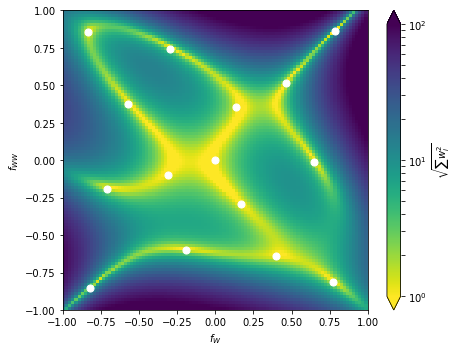

In [48]:
fig = plt.figure(figsize=(6.5,5))
ax = plt.gca()



pcm = ax.pcolormesh(xi, yi, squared_weights,
                   norm=matplotlib.colors.LogNorm(vmin=1., vmax=1.e2),
                   cmap='viridis_r')
cbar = fig.colorbar(pcm, ax=ax, extend='both')

plt.scatter(basis[:,0], basis[:,1], s=50., c='w')

plt.xlabel(r'$f_W$')
plt.ylabel(r'$f_{WW}$')
cbar.set_label(r'$\sqrt{\sum w_i^2}$')
plt.xlim(-1.,1.)
plt.ylim(-1.,1.)



plt.tight_layout()
plt.show()


## 4. Export parameter and reweight cards, integrating along two different scenarios

In [6]:
miner.export_cards(
    'templates/param_card_template.dat',
    'templates/reweight_card_template.dat',
    'MG_process_1'
)

In [7]:
miner.export_cards(
    'templates/param_card_template.dat',
    'templates/reweight_card_template.dat',
    'MG_process_2',
    sample_benchmark='avocados'
)

KeyError: 'avocados'